# Titanic: Machine Learning from Disaster
### Predict survival on the Titanic
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

## Download the data

You can download the data for this notebook here: https://www.kaggle.com/c/titanic/data

## 1. Defining the problem statement
Complete the analysis of what sorts of people were likely to survive.  
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

## 2. We will need to download all relevant dependencies we need. 

as well as upload train and test datasets 

In [102]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

### Loading in the data

After we've downloaded the data, we need to get it into the notebook.

I've stored my downloaded data in a file called `data`.

In [2]:
# Import train & test data 
train = pd.read_csv(r'data/train.csv')
test = pd.read_csv(r'data/test.csv')
gender_submission = pd.read_csv(r'data/gender_submission.csv')

In [3]:
#View Titanic Dataset 
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


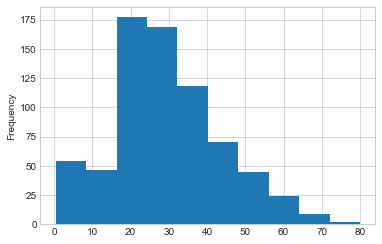

In [4]:
train.Age.plot.hist()

In [5]:
# View the test data
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
# View the gender_submisison
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Data Descriptions

**Survival:** 0 = No, 1 = Yes

**pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd

**sex:** Sex

**Age:** Age in years

**sibsp:** number of siblings/spouses aboard the Titanic

**parch:** number of parents/children aboard the Titanic

**ticket:** Ticket number

**fare:** Passenger fare

**cabin:** Cabin number

**embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## What missing values are there?

Where are the missing values in our data?

These are rows which are missing a value or put as NaN 

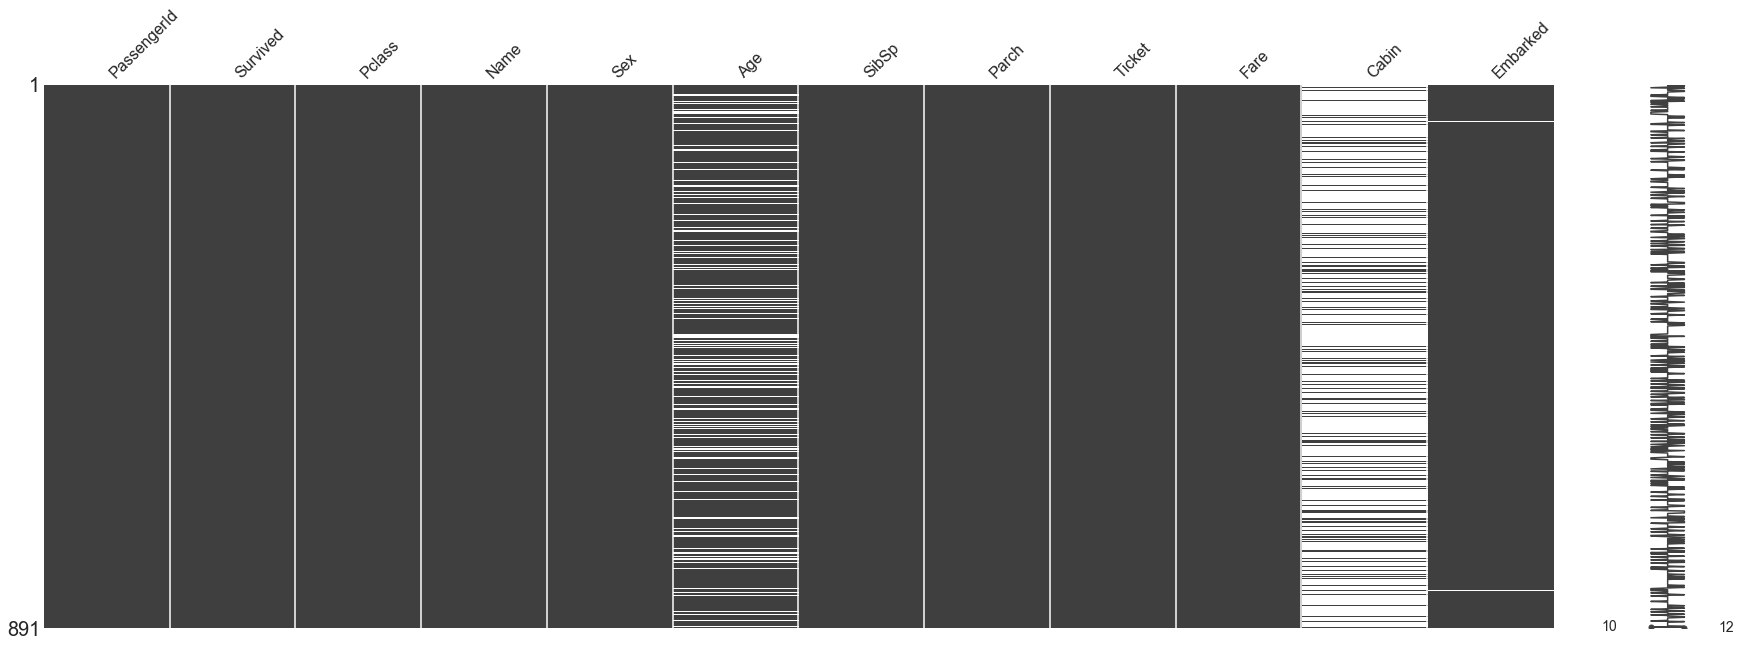

In [8]:
# Plot graphic of missing values
missingno.matrix(train, figsize = (30,10))

Ok we can clearly see some missing values in Age and especially in the cabin column.

Knowing this will aid us figuring out what kind of data cleaning and preprocessing is needed.

## What datatypes are in the data?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

However, as we dig deeper, we might find features which are numerical may actually be categorical.

The goal for the next few steps is to figure out how best to process the data so our machine learning model can learn from it. Easist will be working with numerical values.

In [9]:
#Lets have a look at the data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Objective: Who has Servived

Description: Whether the passenger survived or not.
    
Key: 0 = did not survive, 1 = survived
    
This key variable we want our machine learning model to predict based off.

0    549
1    342
Name: Survived, dtype: int64


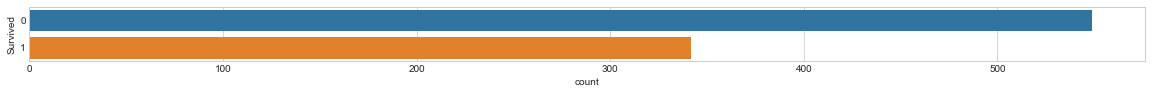

In [11]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

### Value: Pclass

Description: The ticket class of the passenger.
    
Key: 1 = 1st class, 2 = 2nd class, 3 = 3rd class

#### Let's plot the distribution
We will look at the distribution of each feature first if we can to understand what kind of spread there is across the dataset. 
Mainly looking for outliers in out data set. If there are any we should include then in. 

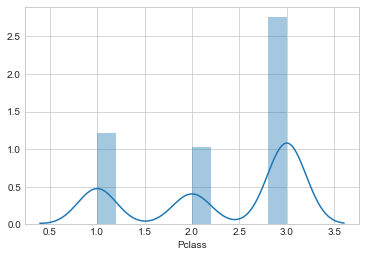

In [12]:
sns.distplot(train.Pclass)

we can see that in feature pclass, the values are numerical. But they are in categories. Because adding them together will not make equal to the other, e.i. adding 3rd class with 2nd class and makd 1st class. 

### Feature: Name
    
Description: The name of the passenger.

In [13]:
train.Name.value_counts()

Hays, Miss. Margaret Bechstein                   1
Osman, Mrs. Mara                                 1
Jussila, Mr. Eiriik                              1
Hansen, Mr. Henrik Juul                          1
Harrington, Mr. Charles H                        1
                                                ..
O'Brien, Mr. Thomas                              1
Devaney, Miss. Margaret Delia                    1
Seward, Mr. Frederic Kimber                      1
Carbines, Mr. William                            1
Romaine, Mr. Charles Hallace ("Mr C Rolmane")    1
Name: Name, Length: 891, dtype: int64

Every row has a unique name. This is equivalent to the passenger ID.

In [14]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [15]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Jonkheer      1
Sir           1
Don           1
Ms            1
Mme           1
Lady          1
Countess      1
Name: Title, dtype: int64

In [16]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

#### Title map
Mr : 0  
Miss : 1  
Mrs: 2  
Others: 3


In [17]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,"Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

Looking at the data, as you can see, there are a big number of small title. Combining them together into one category hopefully will provide better test resutls. 

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


### Feature: Sex

Description: The sex of the passenger (male or female).

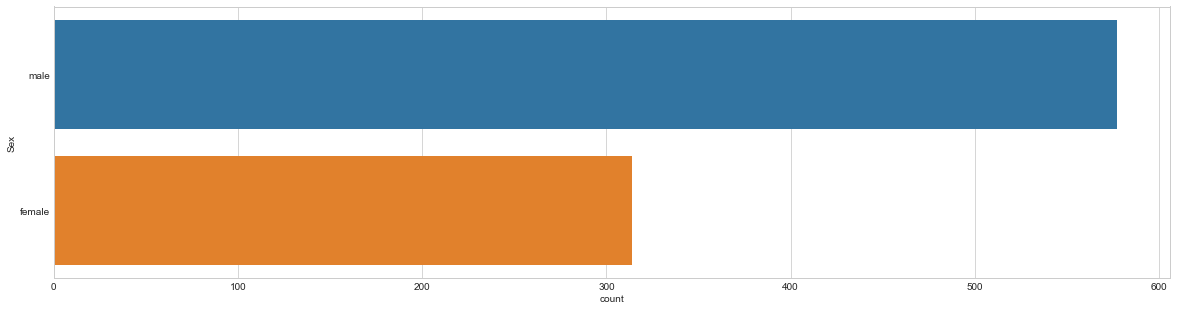

In [20]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train);

In [21]:
# Are there any missing values in this column? Double check. 
train.Sex.isnull().sum()

0

In [22]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

TypeError: unsupported operand type(s) for /: 'str' and 'int'

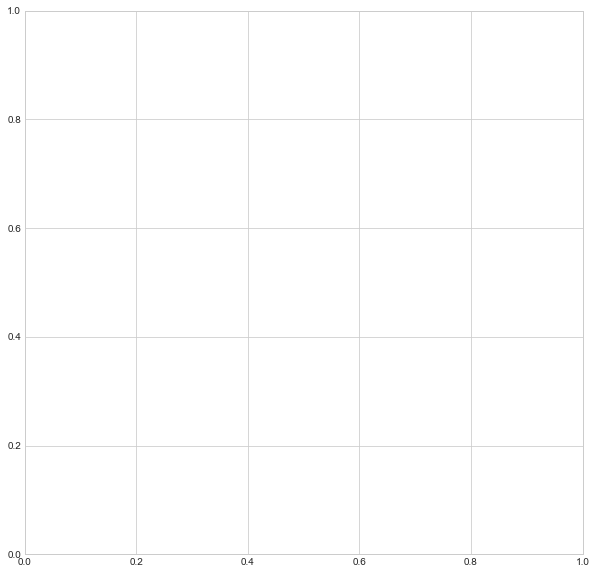

In [23]:
# How does the Sex variable look compared to Survival?
fig = plt.figure(figsize=(10, 10))
sns.distplot(train.loc[train['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(train.loc[train['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

How many have survived, however the majority are female. Gives a good idea of the decision making after the ship has crashed. 

### Feature: Age

Description: The age of the passenger.

In [24]:
# We had quite a few missing values in column age, how many?
train.Age.isnull().sum()

177

Out of 891 rows, that's almost one quarter of the dataset.

Let's use Title's median age for missing Age.

In [25]:
train.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [26]:
# fill missing age with median age for each title, as we devided into Mr, Mrs, Miss, Other. 
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [27]:
train.head(20)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

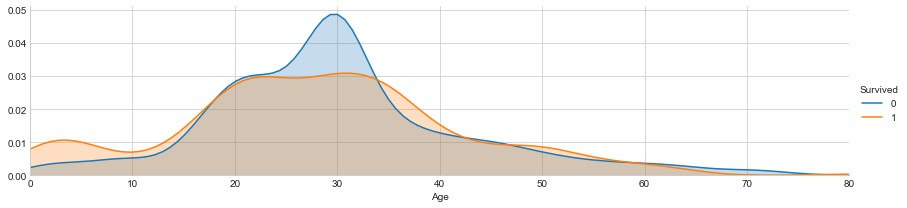

In [28]:
#Visualising survival rate by age
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

(0, 20)

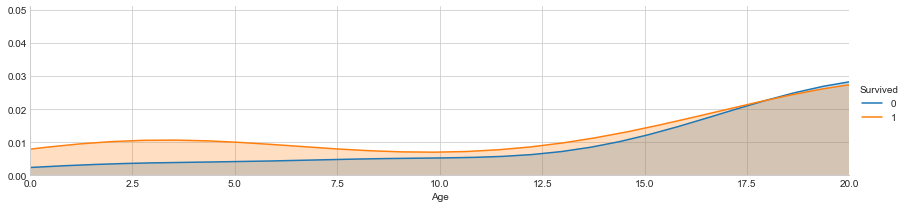

In [29]:
#Visualising survival rate by age, below 20 years old. 
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20, 30)

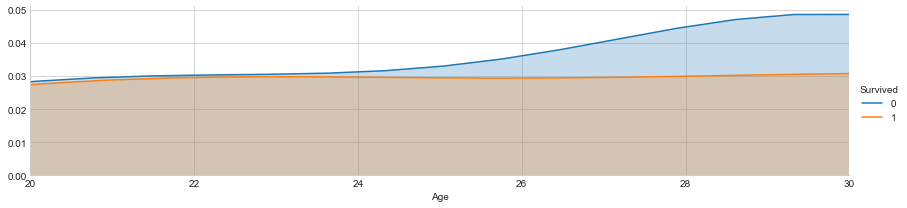

In [30]:
#Visualising survivial rate by age, from 20 - 30. 
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30, 40)

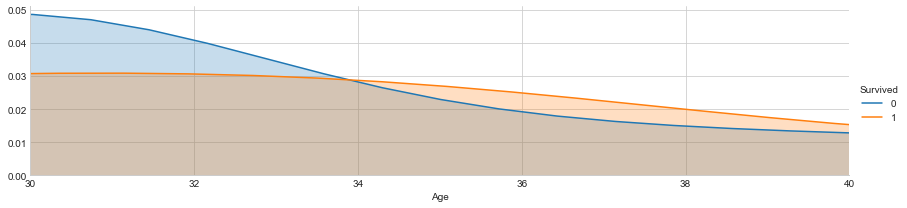

In [31]:
#Visualising survival rate by age, from 30 - 40. 
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40, 60)

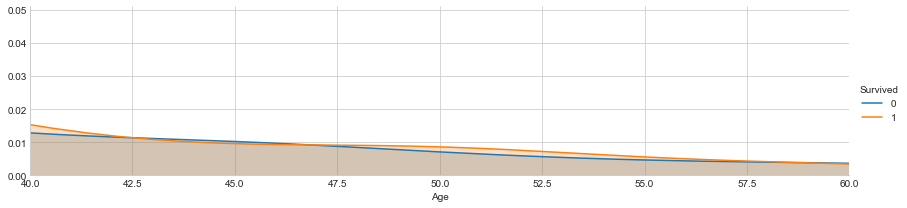

In [32]:
#Visualising survival rate by age, from 40 - 60. 
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60, 80)

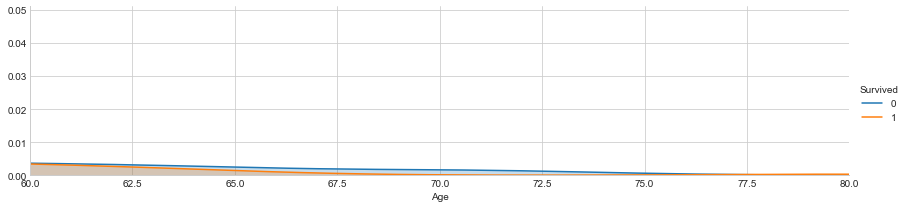

In [33]:
#Visualising survival rate by age, from 60 - 80. 
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60, 80)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Now lets convert the numarical age groups into a categorical variable. 

feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

In [36]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,0


### Feature: SibSp

Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [38]:
#Any missing values? 
train.SibSp.isnull().sum()

0

In [39]:
# What values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

#### Function to create count and distribution visualisations

In [40]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});#### Function to create count and distribution visualisations

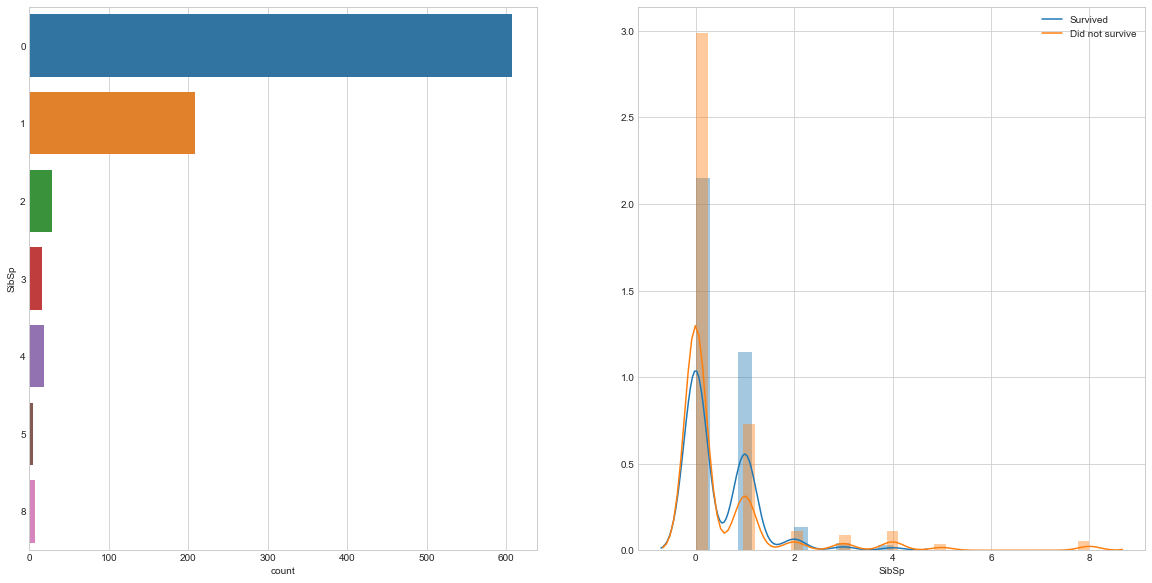

In [41]:
# Visualise the counts of SibSp and the distribution of the values against Survived
plot_count_dist(train, 
                bin_df=train, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

### Feature: Parch

Description: The number of parents/children the passenger has aboard the Titanic.

Due to a similar feature as SibSp, we will do the same analysis. 

In [42]:
#Any missing values? 
train.Parch.isnull().sum()

0

In [43]:
# What values are there?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

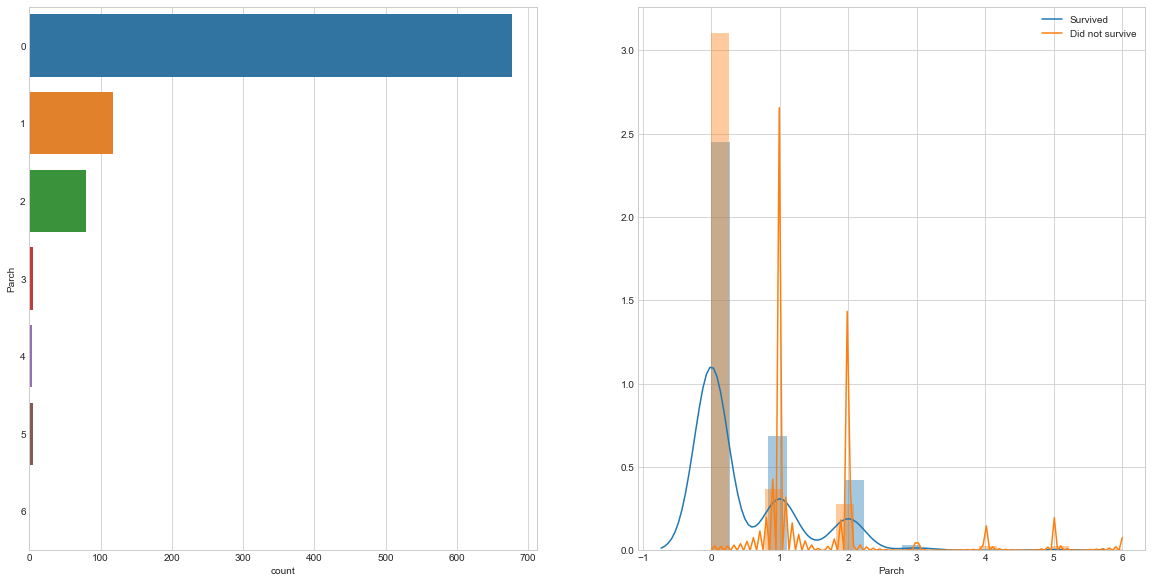

In [44]:
# Visualise the counts of Parch and the distribution of the values against Survived
plot_count_dist(train, 
                bin_df=train, 
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,0


### New Feature - Family, combination of SibSp and Parch 

Due to the similarities and potential similar impact on the study, we can combine these variables. 

In [46]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

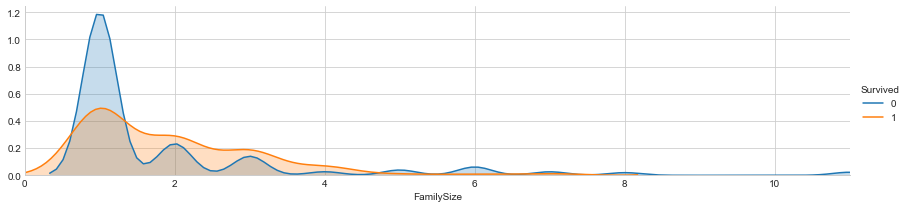

In [47]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [48]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2,0.4
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,2,0.4
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,0,0.0


### Feature: Ticket

Description: The ticket number of the boarding passenger.

In [50]:
# How many missing values does Ticket have?
train.Ticket.isnull().sum()

0

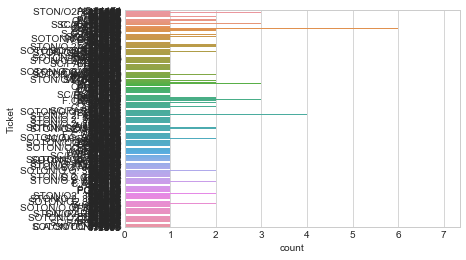

In [51]:
# How many kinds of ticket are there?
sns.countplot(y="Ticket", data=train);

In [52]:
# How many kinds of ticket are there?
train.Ticket.value_counts()

1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
           ..
236171      1
7546        1
65303       1
349213      1
695         1
Name: Ticket, Length: 681, dtype: int64

In [53]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


### Feature: Fare

Description: How much the ticket cost.

In [54]:
# How many missing values does Fare have?
train.Fare.isnull().sum()

0

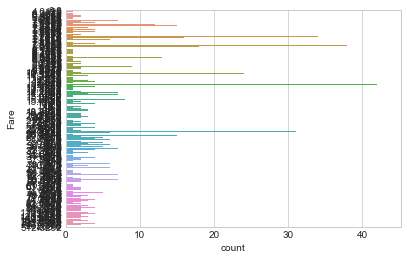

In [55]:
# How many different values of Fare are there?
sns.countplot(y="Fare", data=train);

In [56]:
# What kind of variable is Fare?
train.Fare.dtype

dtype('float64')

In [57]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


In [58]:
# What do our Fare look like?
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

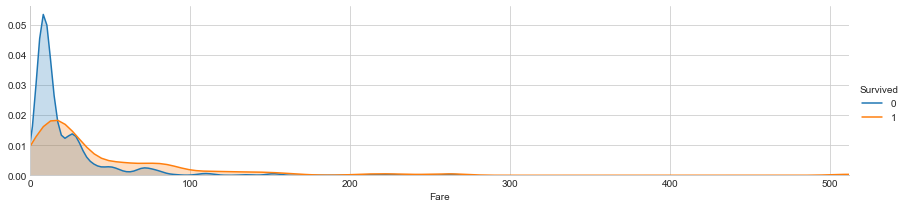

In [59]:
#Visualising the fare price to survival rate 
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

(0, 30)

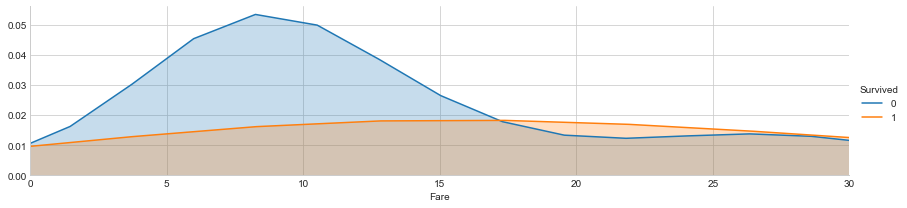

In [60]:
#Have a closer look for fare price from 0 - 30 
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

### Feature: Cabin

Description: The cabin number where the passenger was staying.    

In [61]:
# How many missing values does Cabin have?
train.Cabin.isnull().sum()

687

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2,0.4
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,2,0.4
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,0,0.0


In [63]:
# What do the Cabin values look like?
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
F2             3
              ..
D19            1
E63            1
B73            1
C70            1
B3             1
Name: Cabin, Length: 147, dtype: int64

Since there are too many missing values, we won't use Cabin for our initial models.

### Feature: Embarked

Description: The port where the passenger boarded the Titanic.
    
Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [64]:
# How many missing values does Embarked have?
train.Embarked.isnull().sum()

2

In [65]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

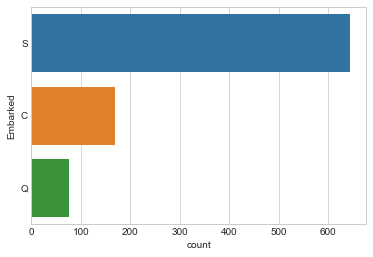

In [66]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

#### What to do with missing values? 

We have an option either deleting the two rows with missing embarked, or we can randomly assign a categoryt of S, C or Q to them. Both options are valid. However we will go with removing those two row in this dataset. 

In [67]:
# Remove Embarked rows which are missing values
print(len(train))
train = train.dropna(subset=['Embarked'])
train = train.dropna(subset=['Embarked'])
print(len(train))

891
889


## Feature Encoding
Now we make our two sub dataframes. We can encode the features so they're ready to be used with our machine learning models.

We will encode our binned dataframe (`df_bin`) with one-hot encoding and our continuous dataframe (`df_con`) with the label encoding function from `sklearn`.

In [68]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

In [69]:
# How we are adding all features we have found while studying the data. Strating with Survived. 
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [70]:
#Same for Pclass
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

In [71]:
# add Sex to the subset dataframes
df_bin['Sex'] = train['Sex']
df_con['Sex'] = train['Sex']

In [72]:
#Add Age to subset dataframe 
df_bin['Age'] = pd.cut(train['Age'], 10) # bucketed/binned into different categories
df_con['Age'] = train['Age'] # non-bucketed

In [73]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

In [74]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

In [75]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised 

In [76]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [77]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,"(0.8, 1.2]",1,0,"(-0.512, 102.466]",S
1,1,1,female,"(2.8, 3.2]",1,0,"(-0.512, 102.466]",C
2,1,3,female,"(0.8, 1.2]",0,0,"(-0.512, 102.466]",S
3,1,1,female,"(1.6, 2.0]",1,0,"(-0.512, 102.466]",S
4,0,3,male,"(1.6, 2.0]",0,0,"(-0.512, 102.466]",S


In [78]:
# One-hot encode binned variables. This helps the computer to run the data model smoother. 
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,"Age_(-0.004, 0.4]","Age_(0.4, 0.8]","Age_(0.8, 1.2]","Age_(1.2, 1.6]",...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [79]:
df_con.head(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1.0,1,0,7.2500,S
1,1,1,female,3.0,1,0,71.2833,C
2,1,3,female,1.0,0,0,7.9250,S
3,1,1,female,2.0,1,0,53.1000,S
4,0,3,male,2.0,0,0,8.0500,S
5,0,3,male,2.0,0,0,8.4583,Q
6,0,1,male,3.0,0,0,51.8625,S
7,0,3,male,0.0,3,1,21.0750,S


In [80]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [81]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [82]:
# Now let's look at df_con_enc
df_con_enc.head(10)

,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,3.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,1.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,2.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,2.0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,2.0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,3.0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,0.0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,2.0,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,0.0,1,0,30.0708,1,0,0,1,0,0,1,0


## Building Machine Learning Models
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

In [83]:
# Split the dataframe into data and labels
X_train = df_con_enc.drop('Survived', axis=1) # data
Y_train = df_con_enc.Survived # labels

In [84]:
# Shape of the data (without labels)
X_train.shape

(889, 12)

In [85]:
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,3.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,2.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,2.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [86]:
# Shape of the labels
Y_train.shape

(889,)

### Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [87]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, Y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, Y_train)
    acc = round(model.score(X_train, Y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, X_train, Y_train, cv=cv, n_jobs = -1)
    
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(Y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [88]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train, Y_train, 10)

log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 80.76
Accuracy CV 10-Fold: 79.98
Running Time: 0:00:02.479463


### K-Nearest Neighbours

In [89]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), X_train, Y_train, 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 84.25
Accuracy CV 10-Fold: 77.17
Running Time: 0:00:00.087968


### Gaussian Naive Bayes

In [90]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), X_train, Y_train, 10)

gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.97
Accuracy CV 10-Fold: 78.4
Running Time: 0:00:00.031247


### Linear Support Vector Machines (SVC)

In [91]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(), X_train, Y_train, 10)

linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 80.76
Accuracy CV 10-Fold: 77.73
Running Time: 0:00:00.126489


### Stochastic Gradient Descent

In [92]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), X_train, Y_train, 10)

sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 61.75
Accuracy CV 10-Fold: 74.24
Running Time: 0:00:00.052117


### Decision Tree Classifier

In [93]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), X_train, Y_train, 10)

dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 94.38
Accuracy CV 10-Fold: 78.52
Running Time: 0:00:00.070277


### Gradient Boost Trees

In [94]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), X_train, Y_train, 10)

gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 88.98
Accuracy CV 10-Fold: 82.68
Running Time: 0:00:00.296711


### CatBoost Algorithm
CatBoost is a state-of-the-art open-source gradient boosting on decision trees library.
For more, check out the [CatBoost docs](https://catboost.ai/).

In [95]:
# View the data for the CatBoost model
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,3.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,2.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,2.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [96]:
# View the labels for the CatBoost model
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [100]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11])

In [103]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, Y_train, cat_features)

In [105]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.009797


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6873137	total: 6.76ms	remaining: 6.76s
1:	learn: 0.6829415	total: 10ms	remaining: 5s
2:	learn: 0.6766640	total: 14.5ms	remaining: 4.82s
3:	learn: 0.6714256	total: 18ms	remaining: 4.48s
4:	learn: 0.6658457	total: 21.7ms	remaining: 4.32s
5:	learn: 0.6596006	total: 25.6ms	remaining: 4.24s
6:	learn: 0.6542796	total: 30.5ms	remaining: 4.33s
7:	learn: 0.6493509	total: 34.2ms	remaining: 4.24s
8:	learn: 0.6434811	total: 37.8ms	remaining: 4.16s
9:	learn: 0.6405011	total: 39ms	remaining: 3.86s
10:	learn: 0.6354750	total: 41.4ms	remaining: 3.72s
11:	learn: 0.6309475	total: 44.3ms	remaining: 3.65s
12:	learn: 0.6258472	total: 47.5ms	remaining: 3.6s
13:	learn: 0.6222497	total: 50.4ms	remaining: 3.55s
14:	learn: 0.6168615	total: 53ms	remaining: 3.48s
15:	learn: 0.6127860	total: 54.8ms	remaining: 3.37s
16:	learn: 0.6081184	total: 57.5ms	remaining: 3.32s
17:	learn: 0.6056702	total: 58.8ms	remaining: 3.21s
18:	learn: 0.6013149	total: 60.8ms	remaining: 3.14s
19:	learn: 0.5969150	total: 63.5ms

229:	learn: 0.3834383	total: 572ms	remaining: 1.91s
230:	learn: 0.3833847	total: 574ms	remaining: 1.91s
231:	learn: 0.3831132	total: 576ms	remaining: 1.91s
232:	learn: 0.3829562	total: 579ms	remaining: 1.91s
233:	learn: 0.3827698	total: 582ms	remaining: 1.9s
234:	learn: 0.3825423	total: 584ms	remaining: 1.9s
235:	learn: 0.3823821	total: 587ms	remaining: 1.9s
236:	learn: 0.3821896	total: 589ms	remaining: 1.9s
237:	learn: 0.3819447	total: 592ms	remaining: 1.89s
238:	learn: 0.3817999	total: 594ms	remaining: 1.89s
239:	learn: 0.3817956	total: 595ms	remaining: 1.88s
240:	learn: 0.3813643	total: 598ms	remaining: 1.88s
241:	learn: 0.3811589	total: 600ms	remaining: 1.88s
242:	learn: 0.3810284	total: 602ms	remaining: 1.88s
243:	learn: 0.3809936	total: 604ms	remaining: 1.87s
244:	learn: 0.3809144	total: 606ms	remaining: 1.87s
245:	learn: 0.3806972	total: 608ms	remaining: 1.86s
246:	learn: 0.3804467	total: 610ms	remaining: 1.86s
247:	learn: 0.3800562	total: 613ms	remaining: 1.86s
248:	learn: 0.37

465:	learn: 0.3514484	total: 1.15s	remaining: 1.32s
466:	learn: 0.3512644	total: 1.15s	remaining: 1.31s
467:	learn: 0.3511803	total: 1.15s	remaining: 1.31s
468:	learn: 0.3510209	total: 1.16s	remaining: 1.31s
469:	learn: 0.3509998	total: 1.16s	remaining: 1.31s
470:	learn: 0.3507794	total: 1.16s	remaining: 1.3s
471:	learn: 0.3507424	total: 1.16s	remaining: 1.3s
472:	learn: 0.3506539	total: 1.17s	remaining: 1.3s
473:	learn: 0.3506515	total: 1.17s	remaining: 1.29s
474:	learn: 0.3505191	total: 1.17s	remaining: 1.29s
475:	learn: 0.3504926	total: 1.17s	remaining: 1.29s
476:	learn: 0.3504678	total: 1.17s	remaining: 1.28s
477:	learn: 0.3503182	total: 1.17s	remaining: 1.28s
478:	learn: 0.3501769	total: 1.18s	remaining: 1.28s
479:	learn: 0.3500060	total: 1.18s	remaining: 1.27s
480:	learn: 0.3499502	total: 1.18s	remaining: 1.27s
481:	learn: 0.3498845	total: 1.18s	remaining: 1.27s
482:	learn: 0.3496501	total: 1.18s	remaining: 1.27s
483:	learn: 0.3496027	total: 1.18s	remaining: 1.26s
484:	learn: 0.3

671:	learn: 0.3333138	total: 1.52s	remaining: 741ms
672:	learn: 0.3333138	total: 1.52s	remaining: 738ms
673:	learn: 0.3332868	total: 1.52s	remaining: 736ms
674:	learn: 0.3331104	total: 1.52s	remaining: 734ms
675:	learn: 0.3331086	total: 1.53s	remaining: 732ms
676:	learn: 0.3329725	total: 1.53s	remaining: 729ms
677:	learn: 0.3328996	total: 1.53s	remaining: 727ms
678:	learn: 0.3328413	total: 1.53s	remaining: 725ms
679:	learn: 0.3326134	total: 1.53s	remaining: 722ms
680:	learn: 0.3324061	total: 1.54s	remaining: 720ms
681:	learn: 0.3323941	total: 1.54s	remaining: 718ms
682:	learn: 0.3323110	total: 1.54s	remaining: 715ms
683:	learn: 0.3322813	total: 1.54s	remaining: 712ms
684:	learn: 0.3322502	total: 1.54s	remaining: 710ms
685:	learn: 0.3321868	total: 1.54s	remaining: 707ms
686:	learn: 0.3321324	total: 1.55s	remaining: 705ms
687:	learn: 0.3320965	total: 1.55s	remaining: 702ms
688:	learn: 0.3319111	total: 1.55s	remaining: 700ms
689:	learn: 0.3319105	total: 1.55s	remaining: 697ms
690:	learn: 

859:	learn: 0.3171932	total: 1.91s	remaining: 311ms
860:	learn: 0.3171522	total: 1.91s	remaining: 309ms
861:	learn: 0.3171263	total: 1.92s	remaining: 307ms
862:	learn: 0.3170784	total: 1.92s	remaining: 305ms
863:	learn: 0.3170390	total: 1.92s	remaining: 303ms
864:	learn: 0.3168575	total: 1.93s	remaining: 301ms
865:	learn: 0.3167328	total: 1.93s	remaining: 299ms
866:	learn: 0.3167183	total: 1.93s	remaining: 296ms
867:	learn: 0.3166546	total: 1.93s	remaining: 294ms
868:	learn: 0.3166490	total: 1.94s	remaining: 292ms
869:	learn: 0.3166490	total: 1.94s	remaining: 290ms
870:	learn: 0.3165935	total: 1.94s	remaining: 287ms
871:	learn: 0.3164676	total: 1.94s	remaining: 285ms
872:	learn: 0.3163549	total: 1.95s	remaining: 283ms
873:	learn: 0.3163035	total: 1.95s	remaining: 281ms
874:	learn: 0.3162192	total: 1.95s	remaining: 279ms
875:	learn: 0.3161187	total: 1.95s	remaining: 276ms
876:	learn: 0.3160677	total: 1.96s	remaining: 274ms
877:	learn: 0.3159725	total: 1.96s	remaining: 272ms
878:	learn: 

In [106]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6744633	test: 0.6750472	best: 0.6750472 (0)	total: 104ms	remaining: 1m 43s
1:	learn: 0.6618679	test: 0.6628118	best: 0.6628118 (1)	total: 145ms	remaining: 1m 12s
2:	learn: 0.6460560	test: 0.6480156	best: 0.6480156 (2)	total: 199ms	remaining: 1m 6s
3:	learn: 0.6306568	test: 0.6332508	best: 0.6332508 (3)	total: 243ms	remaining: 1m
4:	learn: 0.6161051	test: 0.6196543	best: 0.6196543 (4)	total: 296ms	remaining: 58.8s
5:	learn: 0.6020174	test: 0.6068296	best: 0.6068296 (5)	total: 350ms	remaining: 57.9s
6:	learn: 0.5891389	test: 0.5955047	best: 0.5955047 (6)	total: 403ms	remaining: 57.1s
7:	learn: 0.5786473	test: 0.5850159	best: 0.5850159 (7)	total: 449ms	remaining: 55.7s
8:	learn: 0.5687228	test: 0.5760351	best: 0.5760351 (8)	total: 499ms	remaining: 55s
9:	learn: 0.5588190	test: 0.5667763	best: 0.5667763 (9)	total: 545ms	remaining: 54s
10:	learn: 0.5495172	test: 0.5579937	best: 0.5579937 (10)	total: 594ms	remaining: 53.4s
11:	learn: 0.5401661	test: 0.5495325	best: 0.5495325 (11)

96:	learn: 0.3698141	test: 0.4238463	best: 0.4238041 (95)	total: 4.2s	remaining: 39.1s
97:	learn: 0.3693583	test: 0.4238465	best: 0.4238041 (95)	total: 4.23s	remaining: 39s
98:	learn: 0.3689299	test: 0.4237202	best: 0.4237202 (98)	total: 4.28s	remaining: 38.9s
99:	learn: 0.3685128	test: 0.4236160	best: 0.4236160 (99)	total: 4.31s	remaining: 38.8s
100:	learn: 0.3678623	test: 0.4236181	best: 0.4236160 (99)	total: 4.35s	remaining: 38.7s
101:	learn: 0.3673490	test: 0.4236451	best: 0.4236160 (99)	total: 4.39s	remaining: 38.7s
102:	learn: 0.3669394	test: 0.4236861	best: 0.4236160 (99)	total: 4.43s	remaining: 38.6s
103:	learn: 0.3664129	test: 0.4236312	best: 0.4236160 (99)	total: 4.48s	remaining: 38.6s
104:	learn: 0.3660721	test: 0.4234553	best: 0.4234553 (104)	total: 4.52s	remaining: 38.5s
105:	learn: 0.3656613	test: 0.4232873	best: 0.4232873 (105)	total: 4.56s	remaining: 38.5s
106:	learn: 0.3652805	test: 0.4232442	best: 0.4232442 (106)	total: 4.59s	remaining: 38.3s
107:	learn: 0.3648449	tes

193:	learn: 0.3348987	test: 0.4198113	best: 0.4192153 (173)	total: 8.34s	remaining: 34.6s
194:	learn: 0.3346436	test: 0.4198659	best: 0.4192153 (173)	total: 8.38s	remaining: 34.6s
195:	learn: 0.3343454	test: 0.4198461	best: 0.4192153 (173)	total: 8.42s	remaining: 34.5s
196:	learn: 0.3339916	test: 0.4198936	best: 0.4192153 (173)	total: 8.46s	remaining: 34.5s
197:	learn: 0.3337618	test: 0.4197118	best: 0.4192153 (173)	total: 8.49s	remaining: 34.4s
198:	learn: 0.3335192	test: 0.4196583	best: 0.4192153 (173)	total: 8.53s	remaining: 34.3s
199:	learn: 0.3331592	test: 0.4197983	best: 0.4192153 (173)	total: 8.57s	remaining: 34.3s
200:	learn: 0.3329501	test: 0.4198198	best: 0.4192153 (173)	total: 8.61s	remaining: 34.2s
201:	learn: 0.3327049	test: 0.4197453	best: 0.4192153 (173)	total: 8.65s	remaining: 34.2s
202:	learn: 0.3323521	test: 0.4196263	best: 0.4192153 (173)	total: 8.69s	remaining: 34.1s
203:	learn: 0.3321726	test: 0.4195440	best: 0.4192153 (173)	total: 8.72s	remaining: 34s
204:	learn: 

288:	learn: 0.3081033	test: 0.4184081	best: 0.4183617 (286)	total: 12.2s	remaining: 30s
289:	learn: 0.3078929	test: 0.4183608	best: 0.4183608 (289)	total: 12.2s	remaining: 30s
290:	learn: 0.3075727	test: 0.4184145	best: 0.4183608 (289)	total: 12.3s	remaining: 30s
291:	learn: 0.3073129	test: 0.4184527	best: 0.4183608 (289)	total: 12.3s	remaining: 29.9s
292:	learn: 0.3070263	test: 0.4184515	best: 0.4183608 (289)	total: 12.4s	remaining: 29.9s
293:	learn: 0.3067146	test: 0.4184402	best: 0.4183608 (289)	total: 12.4s	remaining: 29.8s
294:	learn: 0.3063441	test: 0.4186352	best: 0.4183608 (289)	total: 12.5s	remaining: 29.8s
295:	learn: 0.3060667	test: 0.4187323	best: 0.4183608 (289)	total: 12.6s	remaining: 30s
296:	learn: 0.3057244	test: 0.4186041	best: 0.4183608 (289)	total: 12.7s	remaining: 30s
297:	learn: 0.3054387	test: 0.4184944	best: 0.4183608 (289)	total: 12.7s	remaining: 30s
298:	learn: 0.3051130	test: 0.4184523	best: 0.4183608 (289)	total: 12.8s	remaining: 29.9s
299:	learn: 0.3047412	

383:	learn: 0.2821780	test: 0.4174894	best: 0.4174894 (383)	total: 16.7s	remaining: 26.8s
384:	learn: 0.2819569	test: 0.4174529	best: 0.4174529 (384)	total: 16.8s	remaining: 26.8s
385:	learn: 0.2816230	test: 0.4175890	best: 0.4174529 (384)	total: 16.9s	remaining: 26.9s
386:	learn: 0.2814086	test: 0.4175512	best: 0.4174529 (384)	total: 17s	remaining: 26.9s
387:	learn: 0.2811694	test: 0.4175927	best: 0.4174529 (384)	total: 17s	remaining: 26.9s
388:	learn: 0.2809321	test: 0.4175438	best: 0.4174529 (384)	total: 17.1s	remaining: 26.9s
389:	learn: 0.2806734	test: 0.4174999	best: 0.4174529 (384)	total: 17.1s	remaining: 26.8s
390:	learn: 0.2804086	test: 0.4174468	best: 0.4174468 (390)	total: 17.2s	remaining: 26.8s
391:	learn: 0.2801264	test: 0.4176647	best: 0.4174468 (390)	total: 17.2s	remaining: 26.7s
392:	learn: 0.2799659	test: 0.4177360	best: 0.4174468 (390)	total: 17.3s	remaining: 26.7s
393:	learn: 0.2797723	test: 0.4176489	best: 0.4174468 (390)	total: 17.3s	remaining: 26.6s
394:	learn: 0.

475:	learn: 0.2601783	test: 0.4166368	best: 0.4164455 (474)	total: 21.9s	remaining: 24.1s
476:	learn: 0.2599654	test: 0.4165773	best: 0.4164455 (474)	total: 22s	remaining: 24.1s
477:	learn: 0.2597854	test: 0.4166008	best: 0.4164455 (474)	total: 22s	remaining: 24s
478:	learn: 0.2595243	test: 0.4167303	best: 0.4164455 (474)	total: 22.1s	remaining: 24s
479:	learn: 0.2593533	test: 0.4168606	best: 0.4164455 (474)	total: 22.1s	remaining: 23.9s
480:	learn: 0.2592122	test: 0.4168066	best: 0.4164455 (474)	total: 22.1s	remaining: 23.9s
481:	learn: 0.2589993	test: 0.4168533	best: 0.4164455 (474)	total: 22.2s	remaining: 23.8s
482:	learn: 0.2588430	test: 0.4167876	best: 0.4164455 (474)	total: 22.2s	remaining: 23.8s
483:	learn: 0.2586562	test: 0.4168488	best: 0.4164455 (474)	total: 22.3s	remaining: 23.7s
484:	learn: 0.2584514	test: 0.4168913	best: 0.4164455 (474)	total: 22.3s	remaining: 23.7s
485:	learn: 0.2582490	test: 0.4167752	best: 0.4164455 (474)	total: 22.4s	remaining: 23.6s
486:	learn: 0.2580

567:	learn: 0.2417004	test: 0.4183779	best: 0.4164455 (474)	total: 26.8s	remaining: 20.4s
568:	learn: 0.2414221	test: 0.4183809	best: 0.4164455 (474)	total: 26.8s	remaining: 20.3s
569:	learn: 0.2412144	test: 0.4184838	best: 0.4164455 (474)	total: 26.9s	remaining: 20.3s
570:	learn: 0.2410858	test: 0.4184059	best: 0.4164455 (474)	total: 26.9s	remaining: 20.2s
571:	learn: 0.2408206	test: 0.4184207	best: 0.4164455 (474)	total: 26.9s	remaining: 20.2s
572:	learn: 0.2405808	test: 0.4184393	best: 0.4164455 (474)	total: 27s	remaining: 20.1s
573:	learn: 0.2403907	test: 0.4183973	best: 0.4164455 (474)	total: 27.2s	remaining: 20.2s
574:	learn: 0.2402191	test: 0.4186289	best: 0.4164455 (474)	total: 27.2s	remaining: 20.1s
575:	learn: 0.2400503	test: 0.4185169	best: 0.4164455 (474)	total: 27.3s	remaining: 20.1s
576:	learn: 0.2398335	test: 0.4184827	best: 0.4164455 (474)	total: 27.3s	remaining: 20s
577:	learn: 0.2396291	test: 0.4183823	best: 0.4164455 (474)	total: 27.4s	remaining: 20s
578:	learn: 0.23

662:	learn: 0.2256655	test: 0.4210798	best: 0.4164455 (474)	total: 32.1s	remaining: 16.3s
663:	learn: 0.2254788	test: 0.4211942	best: 0.4164455 (474)	total: 32.1s	remaining: 16.2s
664:	learn: 0.2253042	test: 0.4213540	best: 0.4164455 (474)	total: 32.1s	remaining: 16.2s
665:	learn: 0.2251921	test: 0.4212942	best: 0.4164455 (474)	total: 32.2s	remaining: 16.1s
666:	learn: 0.2250535	test: 0.4212467	best: 0.4164455 (474)	total: 32.2s	remaining: 16.1s
667:	learn: 0.2248966	test: 0.4212987	best: 0.4164455 (474)	total: 32.3s	remaining: 16s
668:	learn: 0.2247391	test: 0.4214541	best: 0.4164455 (474)	total: 32.3s	remaining: 16s
669:	learn: 0.2246079	test: 0.4215378	best: 0.4164455 (474)	total: 32.4s	remaining: 16s
670:	learn: 0.2244608	test: 0.4215220	best: 0.4164455 (474)	total: 32.4s	remaining: 15.9s
671:	learn: 0.2243174	test: 0.4214853	best: 0.4164455 (474)	total: 32.5s	remaining: 15.9s
672:	learn: 0.2241762	test: 0.4214462	best: 0.4164455 (474)	total: 32.5s	remaining: 15.8s
673:	learn: 0.22

756:	learn: 0.2127107	test: 0.4235505	best: 0.4164455 (474)	total: 37.3s	remaining: 12s
757:	learn: 0.2126092	test: 0.4236175	best: 0.4164455 (474)	total: 37.3s	remaining: 11.9s
758:	learn: 0.2124681	test: 0.4236570	best: 0.4164455 (474)	total: 37.4s	remaining: 11.9s
759:	learn: 0.2123445	test: 0.4237025	best: 0.4164455 (474)	total: 37.4s	remaining: 11.8s
760:	learn: 0.2122453	test: 0.4236898	best: 0.4164455 (474)	total: 37.5s	remaining: 11.8s
761:	learn: 0.2120737	test: 0.4237961	best: 0.4164455 (474)	total: 37.5s	remaining: 11.7s
762:	learn: 0.2119423	test: 0.4237886	best: 0.4164455 (474)	total: 37.6s	remaining: 11.7s
763:	learn: 0.2117711	test: 0.4237586	best: 0.4164455 (474)	total: 37.8s	remaining: 11.7s
764:	learn: 0.2116279	test: 0.4237766	best: 0.4164455 (474)	total: 37.9s	remaining: 11.6s
765:	learn: 0.2114754	test: 0.4239365	best: 0.4164455 (474)	total: 37.9s	remaining: 11.6s
766:	learn: 0.2113250	test: 0.4239557	best: 0.4164455 (474)	total: 38s	remaining: 11.5s
767:	learn: 0.

848:	learn: 0.2008530	test: 0.4270982	best: 0.4164455 (474)	total: 42.7s	remaining: 7.6s
849:	learn: 0.2007682	test: 0.4271401	best: 0.4164455 (474)	total: 42.8s	remaining: 7.55s
850:	learn: 0.2006596	test: 0.4271389	best: 0.4164455 (474)	total: 42.8s	remaining: 7.5s
851:	learn: 0.2005526	test: 0.4271291	best: 0.4164455 (474)	total: 42.9s	remaining: 7.45s
852:	learn: 0.2004688	test: 0.4271372	best: 0.4164455 (474)	total: 42.9s	remaining: 7.39s
853:	learn: 0.2003451	test: 0.4271340	best: 0.4164455 (474)	total: 43s	remaining: 7.34s
854:	learn: 0.2002530	test: 0.4272206	best: 0.4164455 (474)	total: 43s	remaining: 7.29s
855:	learn: 0.2001131	test: 0.4272040	best: 0.4164455 (474)	total: 43.1s	remaining: 7.24s
856:	learn: 0.2000275	test: 0.4272658	best: 0.4164455 (474)	total: 43.1s	remaining: 7.19s
857:	learn: 0.1999438	test: 0.4273069	best: 0.4164455 (474)	total: 43.1s	remaining: 7.14s
858:	learn: 0.1997838	test: 0.4274656	best: 0.4164455 (474)	total: 43.2s	remaining: 7.09s
859:	learn: 0.19

941:	learn: 0.1905546	test: 0.4294836	best: 0.4164455 (474)	total: 48.2s	remaining: 2.96s
942:	learn: 0.1904006	test: 0.4295116	best: 0.4164455 (474)	total: 48.2s	remaining: 2.91s
943:	learn: 0.1903521	test: 0.4294879	best: 0.4164455 (474)	total: 48.3s	remaining: 2.86s
944:	learn: 0.1902555	test: 0.4295779	best: 0.4164455 (474)	total: 48.3s	remaining: 2.81s
945:	learn: 0.1901492	test: 0.4296134	best: 0.4164455 (474)	total: 48.4s	remaining: 2.76s
946:	learn: 0.1900006	test: 0.4295608	best: 0.4164455 (474)	total: 48.4s	remaining: 2.71s
947:	learn: 0.1898477	test: 0.4296125	best: 0.4164455 (474)	total: 48.5s	remaining: 2.66s
948:	learn: 0.1897366	test: 0.4297295	best: 0.4164455 (474)	total: 48.5s	remaining: 2.61s
949:	learn: 0.1895790	test: 0.4297459	best: 0.4164455 (474)	total: 48.6s	remaining: 2.56s
950:	learn: 0.1894631	test: 0.4298479	best: 0.4164455 (474)	total: 48.6s	remaining: 2.5s
951:	learn: 0.1893441	test: 0.4297244	best: 0.4164455 (474)	total: 48.7s	remaining: 2.45s
952:	learn:

In [107]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 85.94
Accuracy cross-validation 10-Fold: 83.57
Running Time: 0:00:52.723330


## Model Results
Which model had the best cross-validation accuracy?

### Regular accuracy scores

In [108]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,94.38
6,Gradient Boosting Trees,88.98
7,CatBoost,85.94
0,KNN,84.25
1,Logistic Regression,80.76
4,Linear SVC,80.76
2,Naive Bayes,78.97
3,Stochastic Gradient Decent,61.75


### Cross validation accuracy scores 

In [109]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,83.57
6,Gradient Boosting Trees,82.68
1,Logistic Regression,79.98
5,Decision Tree,78.52
2,Naive Bayes,78.40
4,Linear SVC,77.73
0,KNN,77.17
3,Stochastic Gradient Decent,74.24


We can see from the tables, the CatBoost model had the best results. Getting just under 83.57% is pretty good.

We'll pay more attention to the cross-validation figure.

Cross-validation is more robust than just the `.fit()` models as it does multiple passes over the data instead of one.

Because the CatBoost model got the best results, we'll use it for the next steps.

## Feature Importance
 Final question: which features of the best model were most important for making predictions?


In [113]:
# Feature Importance
def feature_importance(model, data):
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png') 

,imp,col
5,0.595328,embarked_Q
4,1.242395,embarked_C
6,1.763108,embarked_S
10,1.827067,pclass_2
9,2.596028,pclass_1
11,9.786069,pclass_3
1,10.763742,SibSp
2,11.085424,Parch
0,11.360591,Age
3,13.971825,Fare


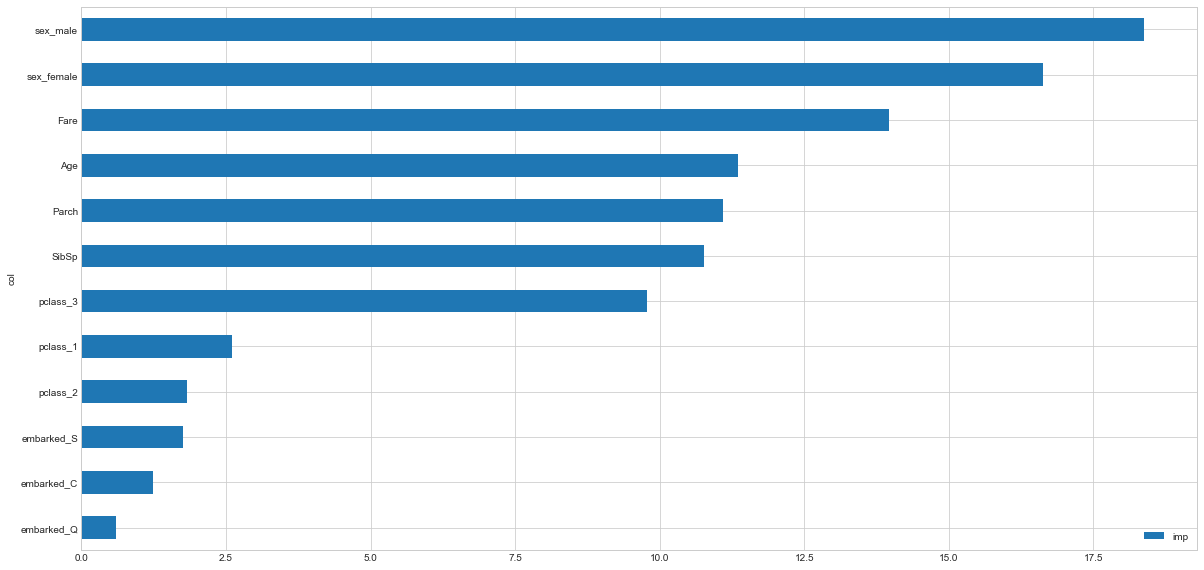

In [115]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

## Precision and Recall

Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

For example, you may have 100,000 people and only 1 of them gets a certain disease. If your model predicts that all people don't have the disease, it only misses 1 in 100,000 so its accuracy is 99.999%. But this isn't really helpful.

This is where precision an recall come in.

**Recall** = a metric which measures a models ability to find all the relevant cases in a dataset.

Recall would be the models ability to find the 1 person in 100,000 who has the disease.

**Precision** = a metric which measures a models ability to correctly identify only relevant instances.

In our example, Precision would be if the model found the 1 person who had the disease, did they actually have the disease.

Combining the precision and recall, gives an **F1 score.**

These metrics will all fall between 0 and 1, with a higher value being better.

Although, they don't necessarily need to come into play for our Titantic problem, they're worth remembering for your future work.

In [116]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8601400206542851
Recall: 0.720405882352941
F1: 0.7840029879305832
AUC: 0.8992503187613844


## Submission
Use the model with the highest cross-validation accuracy score to make a prediction on the test dataset for submission. 

In [117]:
#Our train dataset 
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,3.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,2.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,2.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [118]:
#Data set that we will do the test on. 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",male,2.0,0,0,330911,7.8292,NaN,Q,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,3.0,1,0,363272,7.0000,NaN,S,2,0.4
2,894,2,"Myles, Mr. Thomas Francis",male,3.0,0,0,240276,9.6875,NaN,Q,0,0.0
3,895,3,"Wirz, Mr. Albert",male,2.0,0,0,315154,8.6625,NaN,S,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,1,1,3101298,12.2875,NaN,S,2,0.8


In [119]:
# One hot encode the columns in the test data, to make it look as our X_train set. 
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [120]:
test = pd.concat([test, test_embarked_one_hot, test_sex_one_hot, test_plcass_one_hot], axis=1)

In [121]:
#Let's now have a look at out test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title,FamilySize,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,2.0,0,0,330911,7.8292,NaN,...,0,0.0,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,3.0,1,0,363272,7.0000,NaN,...,2,0.4,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,3.0,0,0,240276,9.6875,NaN,...,0,0.0,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,2.0,0,0,315154,8.6625,NaN,...,0,0.0,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,1,1,3101298,12.2875,NaN,...,2,0.8,0,0,1,1,0,0,0,1


Now we can make preditions on test dataframe. 

In [122]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_female', 'sex_male', 'pclass_1', 'pclass_2',
       'pclass_3'],
      dtype='object')

In [123]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [124]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [125]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [126]:
# What does our submission have to look like?
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [127]:
# Let's convert our submission Survived column to integers. 
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [128]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [129]:
#We ave to make sure that our test is the same lenth as submission dataframe. 
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [138]:
# Convert submisison dataframe to csv for submission to csv 
submission.to_csv('../titanic_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [139]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../titaic_submission.csv")
submissions_check.head()

FileNotFoundError: [Errno 2] File b'../titaic_submission.csv' does not exist: b'../titaic_submission.csv'